# <h1 align="center"><font color="red">Vibration: Time Domain vs Frequency Domain</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

# <font color="gree">Domínio do Tempo</font>

<font color="orange">O `"domínio do tempo"` refere-se à análise de um sinal de vibração em relação ao tempo. Neste domínio, você observa como a amplitude da vibração (geralmente medida em `velocidade`, `aceleração` ou `deslocamento`) varia ao longo do tempo. É a representação mais direta e intuitiva de um sinal de vibração, mostrando o comportamento do sistema mecânico momento a momento.</font>

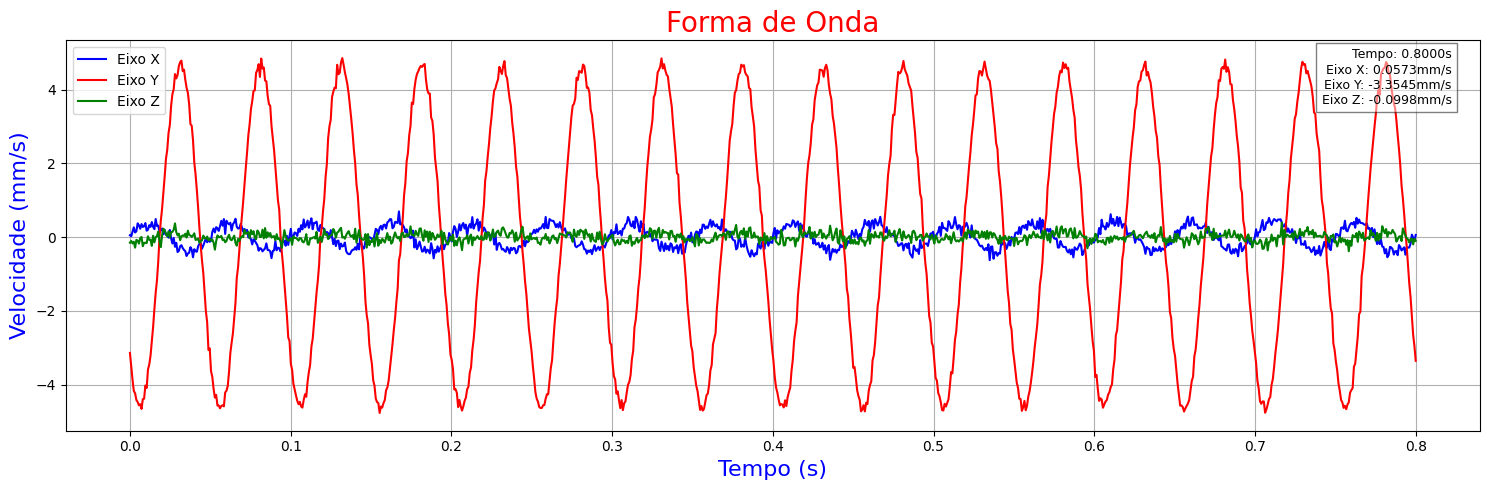

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Configuração dos parâmetros:
tempo = np.linspace(0, 0.8, 1000)
frequencia = 20  # Hz

# Geração dos sinais de vibração:
x = 0.3794 * np.sin(2 * np.pi * frequencia * tempo) + 0.1 * np.random.randn(len(tempo)) # Uma onda senoidal com ruído aleatório
y = -4.6386 * np.sin(2 * np.pi * frequencia * tempo + np.pi/4) + 0.1 * np.random.randn(len(tempo))
z = -0.0973 * np.sin(2 * np.pi * frequencia * tempo + np.pi/3) + 0.1 * np.random.randn(len(tempo))

# Criação do gráfico:
plt.figure(figsize=(15, 5))
plt.plot(tempo, x, label='Eixo X', color='blue')
plt.plot(tempo, y, label='Eixo Y', color='red')
plt.plot(tempo, z, label='Eixo Z', color='green')

plt.title('Forma de Onda', c="r", size="20")
plt.xlabel('Tempo (s)', c="b", size="16")
plt.ylabel('Velocidade (mm/s)', c="b", size="16")
plt.legend()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Tempo: {tempo[-1]:.4f}s\n'
                     f'Eixo X: {x[-1]:.4f}mm/s\n'
                     f'Eixo Y: {y[-1]:.4f}mm/s\n'
                     f'Eixo Z: {z[-1]:.4f}mm/s',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5)) # gca() significa "get current axes" (obter os eixos atuais).

plt.tight_layout() # plt.tight_layout() é usado no Matplotlib para ajustar automaticamente a posição dos elementos no gráfico, como rótulos, títulos, eixos, legendas, e outros, de maneira que eles não fiquem sobrepostos e sejam exibidos de forma clara.
#plt.savefig('forma_de_onda.jpg')
plt.show()


<font color="red">Alguns Insights:</font>

Na legenda do gráfico:

* `Eixo X`: 0.0573 mm/s

Este é um valor positivo, indicando que naquele instante específico, o movimento no eixo X era na direção considerada `"positiva"`.


* `Eixo Y`: -3.3545 mm/s

Valor negativo, significando movimento na direção "negativa" do eixo Y.


* `Eixo Z`: -0.0998 mm/s

Também negativo, mas com uma magnitude muito menor que o eixo Y.



Estes valores representam a `velocidade instantânea` em cada eixo no último ponto do tempo simulado (`0.8000s`, conforme mostrado no gráfico).

`Interpretação no contexto de vibração`:

* A maior amplitude de vibração está no `eixo Y`, sugerindo que o movimento principal ocorre nesta direção.

* O `eixo X` tem uma vibração moderada.

* O `eixo Z` mostra a menor vibração, indicando movimento mínimo nesta direção.

Esta distribuição de amplitudes entre os eixos pode fornecer pistas sobre a `natureza do problema` ou a `característica da máquina`. Por exemplo:

* Em um `motor horizontal`, vibrações mais altas no `eixo Y (vertical)` podem indicar `desbalanceamento`.

* Vibrações significativas em múltiplos eixos podem sugerir `desalinhamento` ou `problemas de fundação`.

Lembre-se que estes são valores instantâneos e a análise completa requer a observação do padrão ao longo do tempo, bem como a análise no `domínio da frequência`.

# <font color="gree">Domínio de Frequência</font>

Na `Análise de Vibração` e processamento de sinais, o domínio de frequência permite que você veja o conteúdo de frequência de um sinal, em vez de observá-lo no `domínio do tempo`, que apenas mostra como o sinal varia ao longo do tempo. Já o `domínio de frequência` nos dá uma perspectiva de como diferentes frequências contribuem para a composição de um sinal.

`O domínio de frequência é uma representação de um sinal que mostra como a amplitude do sinal varia com a frequência. Em vez de observar como um sinal muda ao longo do tempo, como no domínio do tempo, a análise no domínio da frequência permite identificar quais frequências estão presentes em um sinal e a intensidade dessas frequências. Isso é especialmente útil em análises de vibração, onde as frequências podem indicar problemas mecânicos ou anomalias.`


A `Transformada de Fourier` permite que você decompõe o sinal em suas frequências constituintes. Isso é extremamente útil para identificar frequências que estão presentes em vibrações ou outras formas de movimento periódico, especialmente em casos de `diagnóstico de falhas em manutenção preditiva`.

A seguir vamos aplicar a `Transformada Rápida de Fourier` (FFT) ao mesmo sinal que gerei no domínio do tempo anteriormente.

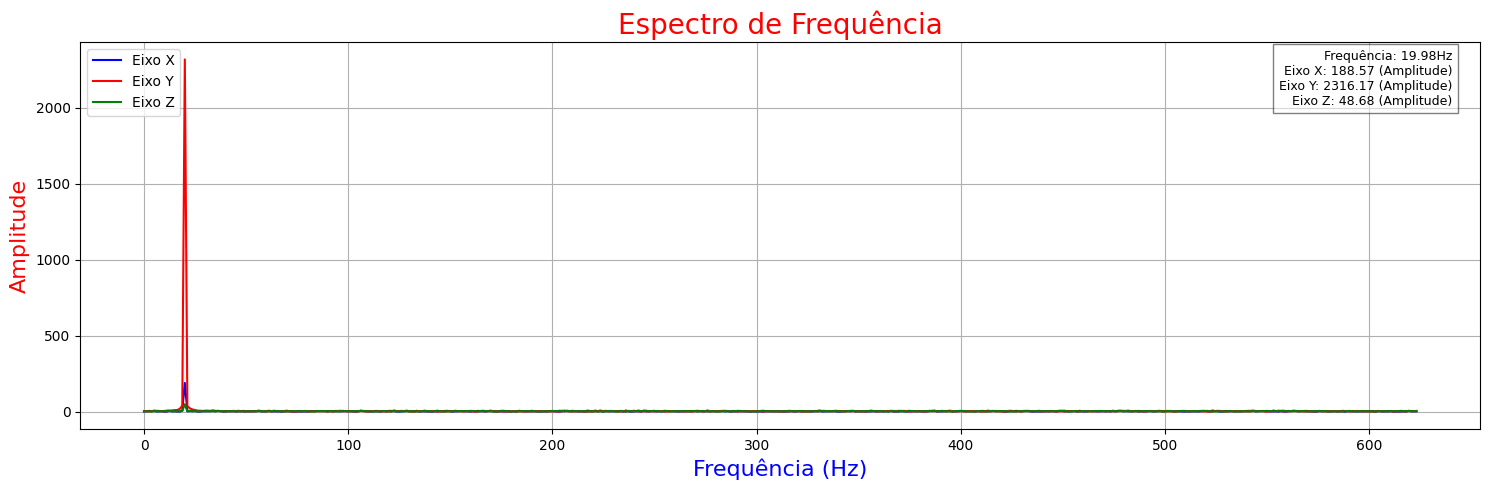

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Configuração dos parâmetros:
tempo = np.linspace(0, 0.8, 1000) # Testar, invés de 0.8 --> 20 
frequencia = 20  # Hz

# Geração dos sinais de vibração:
x = 0.3794 * np.sin(2 * np.pi * frequencia * tempo) + 0.1 * np.random.randn(len(tempo)) # Onda senoidal com ruído aleatório
y = -4.6386 * np.sin(2 * np.pi * frequencia * tempo + np.pi/4) + 0.1 * np.random.randn(len(tempo))
z = -0.0973 * np.sin(2 * np.pi * frequencia * tempo + np.pi/3) + 0.1 * np.random.randn(len(tempo))

# Realizando a Transformada Rápida de Fourier (FFT):
fft_x = np.fft.fft(x) # A função np.fft.fft é usada para transformar o sinal do domínio do tempo para o domínio da frequência.
fft_y = np.fft.fft(y) # O resultado da FFT é um número complexo, cuja magnitude (np.abs) representa a amplitude da frequência e a fase pode ser obtida a partir do ângulo do número complexo.
fft_z = np.fft.fft(z)

# Frequências correspondentes:
frequencias = np.fft.fftfreq(len(tempo), d=tempo[1] - tempo[0]) # As frequências correspondentes são obtidas usando np.fft.fftfreq, e apenas as frequências positivas são usadas para o gráfico (uma vez que o espectro é simétrico).

# Tomando apenas a parte positiva das frequências e da FFT (sinal simétrico):
frequencias_positivas = frequencias[:len(frequencias)//2]
fft_x_pos = np.abs(fft_x[:len(fft_x)//2])
fft_y_pos = np.abs(fft_y[:len(fft_y)//2])
fft_z_pos = np.abs(fft_z[:len(fft_z)//2])

# Criação do gráfico no domínio de frequência:
plt.figure(figsize=(15, 5))
plt.plot(frequencias_positivas, fft_x_pos, label='Eixo X', color='blue')
plt.plot(frequencias_positivas, fft_y_pos, label='Eixo Y', color='red')
plt.plot(frequencias_positivas, fft_z_pos, label='Eixo Z', color='green')

plt.title('Espectro de Frequência', c="r", size="20")
plt.xlabel('Frequência (Hz)', c="b", size="16")
plt.ylabel('Amplitude', c="r", size="16")
plt.legend()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Frequência: {frequencias_positivas[np.argmax(fft_x_pos)]:.2f}Hz\n'
                     f'Eixo X: {fft_x_pos[np.argmax(fft_x_pos)]:.2f} (Amplitude)\n'
                     f'Eixo Y: {fft_y_pos[np.argmax(fft_y_pos)]:.2f} (Amplitude)\n'
                     f'Eixo Z: {fft_z_pos[np.argmax(fft_z_pos)]:.2f} (Amplitude)',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

#plt.xlim(0, 100)  # Zoom no eixo de frequências
plt.tight_layout()
#plt.savefig('espectro_de_frequencia.jpg')
plt.show()


<font color="red">Alguns Insights:</font>


Analisando o gráfico de `Espectro de Frequência` acima, podemos extrair os seguintes insights:

* `Frequência dominante:` 

O gráfico mostra um pico proeminente em aproximadamente 19.98 Hz. Esta é a frequência fundamental ou dominante do sistema vibratório.

* `Amplitude relativa entre eixos:`

    * O `eixo Y (vermelho)` apresenta a maior amplitude, com `2316.17`.

    * O `eixo X (azul)` tem a segunda maior amplitude, com `188.57`.

    * O `eixo Z (verde)` mostra a menor amplitude, com `48.68`.
    
Isso indica que a vibração é mais intensa no eixo Y, seguido pelo eixo X, e menos pronunciada no eixo Z.


* `Harmônicos:` 

Não há evidências claras de harmônicos significativos, pois o gráfico mostra principalmente um único pico dominante.

* `Faixa de frequência:` 

O gráfico abrange uma faixa de `0` a `600 Hz`, mas a atividade significativa está concentrada abaixo de `100 Hz`.

* `Ruído de fundo:` 

Há pouco ruído de fundo visível, o que sugere um sinal relativamente limpo ou uma boa relação `sinal-ruído`.

* `Possíveis causas:`

    * A frequência de `19.98 Hz` pode estar relacionada à `velocidade de rotação` de um componente do maquinário, possivelmente um eixo ou rotor.

    * A alta amplitude no `eixo Y` pode indicar um `desalinhamento`, `desbalanceamento` ou `problema de montagem nessa direção`.


* `Saúde do equipamento:` 

A presença de um pico único e bem definido, sem harmônicos significativos ou ruído de banda larga, sugere que o equipamento pode estar operando de forma relativamente estável, mas com um problema específico causando a vibração no `eixo Y`.

* `Necessidade de ação:`

    * A alta amplitude no `eixo Y (2316.17)` é preocupante e pode indicar a necessidade de `manutenção imediata`.

    * Recomenda-se uma investigação mais aprofundada para identificar a causa da vibração excessiva no `eixo Y`.


* `Monitoramento contínuo:` 

Seria útil comparar este espectro com `medições anteriores e futuras` para detectar mudanças ao longo do tempo.

* `Análise complementar:` 

Para um diagnóstico mais preciso, seria benéfico `correlacionar` estes dados com outras informações como o `tipo de máquina`, `velocidade de operação`, e `possíveis frequências de falha conhecidas para os componentes específicos`.


<font color="orange">Estas observações fornecem uma base para uma análise mais detalhada e podem orientar as próximas etapas na manutenção preditiva e no monitoramento de condição do equipamento.</font>

# <font color="gree">Mais um exemplo de Domínio de Frequência</font>

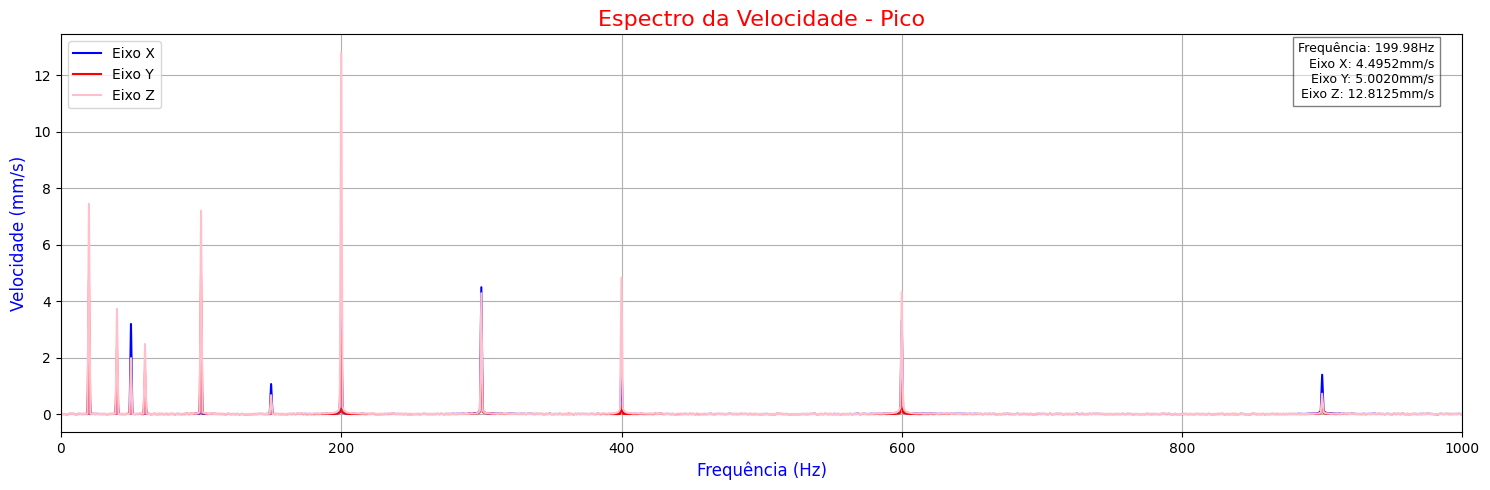

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Configuração dos parâmetros:
tempo = np.linspace(0, 1, 10000)
frequencias_fundamentais = [20, 50, 100, 200, 300] # Múltiplas frequências fundamentais

# Para cada frequência fundamental, harmônicos são adicionados e
# Amplitudes aleatórias são aplicadas para cada componente.

# Função para gerar harmônicos:
def gerar_sinal(freq, amplitude, num_harmonicos):
    sinal = amplitude * np.sin(2 * np.pi * freq * tempo)
    for i in range(2, num_harmonicos + 1):
        sinal += (amplitude / i) * np.sin(2 * np.pi * i * freq * tempo)
    return sinal

# Geração dos sinais de vibração:
x = np.zeros_like(tempo)
y = np.zeros_like(tempo)
z = np.zeros_like(tempo)

for freq in frequencias_fundamentais:
    x += gerar_sinal(freq, np.random.uniform(0.0001, 0.001), 3)
    y += gerar_sinal(freq, np.random.uniform(0.0001, 0.001), 3)
    z += gerar_sinal(freq, np.random.uniform(0.0001, 0.002), 3)

# Ruído é adicionado para tornar o espectro mais realista:
x += 0.00005 * np.random.randn(len(tempo))
y += 0.00005 * np.random.randn(len(tempo))
z += 0.00005 * np.random.randn(len(tempo))

# Realizando a Transformada Rápida de Fourier (FFT):
fft_x = np.fft.fft(x)
fft_y = np.fft.fft(y)
fft_z = np.fft.fft(z)

# Frequências correspondentes:
frequencias = np.fft.fftfreq(len(tempo), d=tempo[1] - tempo[0])

# Tomando apenas a parte positiva das frequências e da FFT:
frequencias_positivas = frequencias[:len(frequencias)//2]
fft_x_pos = np.abs(fft_x[:len(fft_x)//2])
fft_y_pos = np.abs(fft_y[:len(fft_y)//2])
fft_z_pos = np.abs(fft_z[:len(fft_z)//2])

# Criação do gráfico no domínio de frequência:
plt.figure(figsize=(15, 5))
plt.plot(frequencias_positivas, fft_x_pos, label='Eixo X', color='blue')
plt.plot(frequencias_positivas, fft_y_pos, label='Eixo Y', color='red')
plt.plot(frequencias_positivas, fft_z_pos, label='Eixo Z', color='pink')

plt.title('Espectro da Velocidade - Pico', c="r", fontsize=16)
plt.xlabel('Frequência (Hz)', c="b", fontsize=12)
plt.ylabel('Velocidade (mm/s)', c="b", fontsize=12)
plt.legend()
plt.grid(True)

# Encontrar o pico máximo:
max_freq = frequencias_positivas[np.argmax(fft_x_pos + fft_y_pos + fft_z_pos)]
max_x = np.max(fft_x_pos)
max_y = np.max(fft_y_pos)
max_z = np.max(fft_z_pos)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Frequência: {max_freq:.2f}Hz\n'
                     f'Eixo X: {max_x:.4f}mm/s\n'
                     f'Eixo Y: {max_y:.4f}mm/s\n'
                     f'Eixo Z: {max_z:.4f}mm/s',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

plt.xlim(0, 1000)  # Limitar o eixo x para melhor visualização
#plt.ylim(0, 0.005)  # Ajustar o eixo y conforme necessário
plt.tight_layout()
#plt.savefig('espectro_da_velocidade.jpg')
plt.show()

<font color="red">Alguns Insights:</font>


* `Frequência dominante:` 

O pico mais alto ocorre em `199.98 Hz`. Esta é provavelmente a frequência fundamental de vibração do sistema.

* `Amplitude relativa entre eixos:`

    * `Eixo Z (rosa)` tem a maior amplitude: `12.8125 mm/s`

    * `Eixo Y (vermelho)` tem amplitude intermediária: `5.0020 mm/s`

    * `Eixo X (azul)` tem a menor amplitude: `4.4952 mm/s` Isso indica que a vibração é mais intensa no eixo Z.


# <font color="gree">Simulando coleta de dados do `Acelerômetro`, logo Integrado para `Velocidade` e plotado no Domínio de Frequência</font>

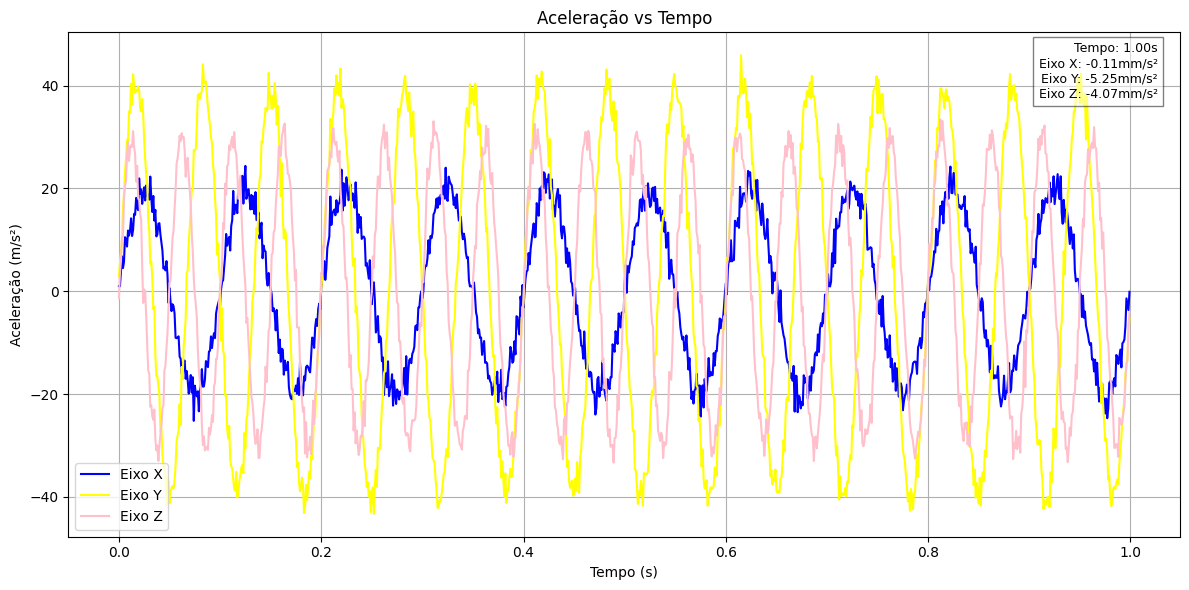

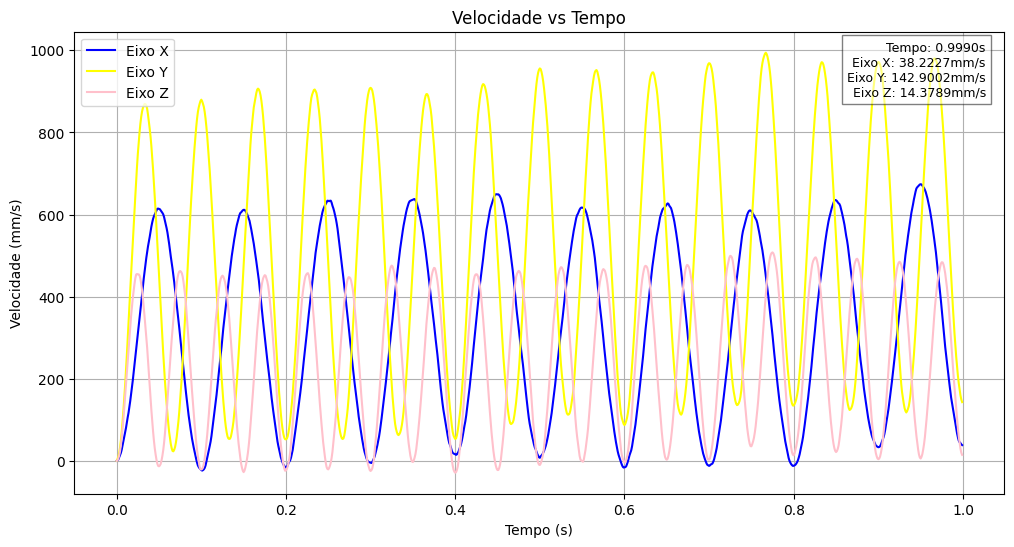

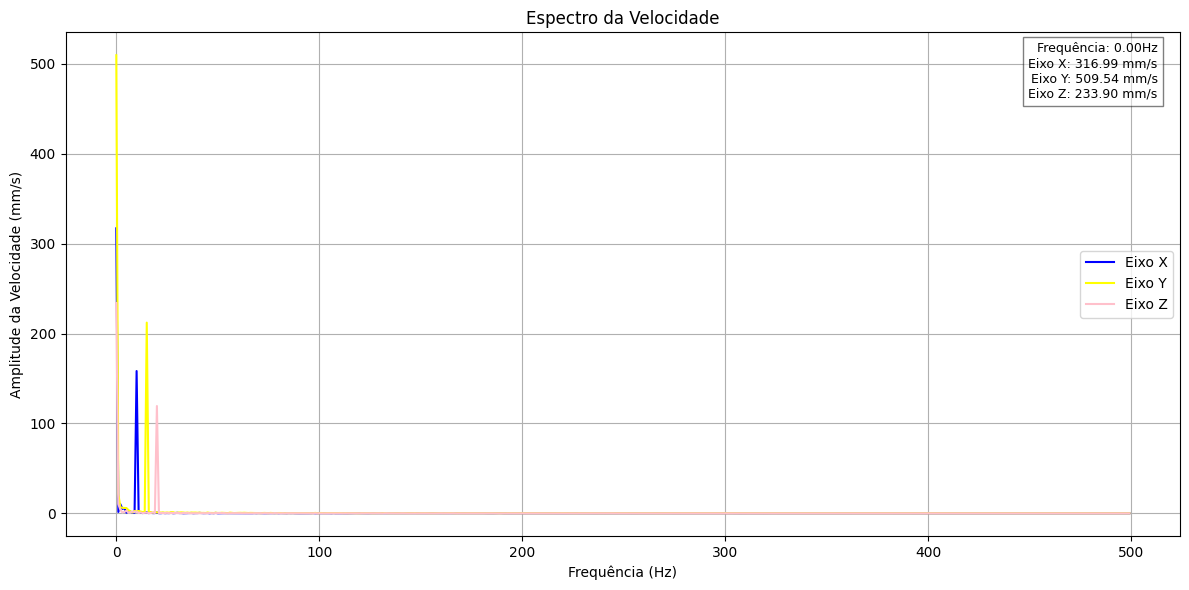

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.integrate import cumulative_trapezoid

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Parâmetros de simulação:
duration = 1.0  # Duração total em segundos
sample_rate = 1000  # Taxa de amostragem em Hz
t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# Simulação de aceleração em 3 eixos:
freq_x, freq_y, freq_z = 10, 15, 20  # Frequências em Hz
amplitude_x, amplitude_y, amplitude_z = 20, 40, 30  # Amplitudes em m/s²

ax = amplitude_x * np.sin(2 * np.pi * freq_x * t) + 2 * np.random.randn(len(t))
ay = amplitude_y * np.sin(2 * np.pi * freq_y * t) + 2 * np.random.randn(len(t))
az = amplitude_z * np.sin(2 * np.pi * freq_z * t) + 2 * np.random.randn(len(t))

# Plotagem da aceleração no domínio do tempo:
plt.figure(figsize=(12, 6))
plt.plot(t, ax, label='Eixo X', color="blue")
plt.plot(t, ay, label='Eixo Y', color="yellow")
plt.plot(t, az, label='Eixo Z', color="pink")
plt.title('Aceleração vs Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s²)')
plt.legend()
plt.tight_layout()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Tempo: {t[-1]:.2f}s\n'
                     f'Eixo X: {ax[-1]:.2f}mm/s²\n'
                     f'Eixo Y: {ay[-1]:.2f}mm/s²\n'
                     f'Eixo Z: {az[-1]:.2f}mm/s²',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Integração para obter velocidade:
vx = cumulative_trapezoid(ax, t, initial=0) * 1000  # Convertendo para mm/s
vy = cumulative_trapezoid(ay, t, initial=0) * 1000
vz = cumulative_trapezoid(az, t, initial=0) * 1000

# Plotagem da velocidade no domínio do tempo:
plt.figure(figsize=(12, 6))
plt.plot(t, vx, label='Eixo X', color="blue")
plt.plot(t, vy, label='Eixo Y', color="yellow")
plt.plot(t, vz, label='Eixo Z', color="pink")
plt.title('Velocidade vs Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (mm/s)')
plt.legend()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Tempo: {t[-1]:.4f}s\n'
                     f'Eixo X: {vx[-1]:.4f}mm/s\n'
                     f'Eixo Y: {vy[-1]:.4f}mm/s\n'
                     f'Eixo Z: {vz[-1]:.4f}mm/s',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Transformada de Fourier da velocidade:
Vx = fft(vx)
Vy = fft(vy)
Vz = fft(vz)
#print(len(Vx))
# Cálculo das frequências para o eixo x do gráfico:
freq = np.fft.fftfreq(len(t), 1/sample_rate) # ou --> np.fft.fftfreq(len(tempo), d=t[1] - t[0])
#print(len(freq))
# Tomando apenas a parte positiva das frequências e da FFT (sinal simétrico):
frequencias_positivas = freq[:len(freq)//2]
fft_x_pos = np.abs(Vx)[:len(freq)//2] / len(Vx) # São iguais --> print(len(Vx)) = print(len(freq))
fft_y_pos = np.abs(Vy[:len(Vy)//2]) / len(Vy)
fft_z_pos = np.abs(Vz[:len(Vz)//2]) / len(Vz)

# Plotagem no domínio da frequência:
plt.figure(figsize=(12, 6))
plt.plot(frequencias_positivas, fft_x_pos, label='Eixo X', color="blue")
plt.plot(frequencias_positivas, fft_y_pos, label='Eixo Y', color="yellow")
plt.plot(frequencias_positivas, fft_z_pos, label='Eixo Z', color="pink")
plt.title('Espectro da Velocidade')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude da Velocidade (mm/s)')
plt.legend()
plt.tight_layout()
plt.grid(True)

# Encontrar o pico máximo:
max_freq = frequencias_positivas[np.argmax(fft_x_pos + fft_y_pos + fft_z_pos)]
max_x = np.max(fft_x_pos) # ou --> fft_x_pos[np.argmax(fft_x_pos)]
max_y = np.max(fft_y_pos) # ou --> fft_y_pos[np.argmax(fft_y_pos)]
max_z = np.max(fft_z_pos) # ou --> fft_z_pos[np.argmax(fft_z_pos)]

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Frequência: {max_freq:.2f}Hz\n'
                     f'Eixo X: {max_x:.2f} mm/s\n'
                     f'Eixo Y: {max_y:.2f} mm/s\n'
                     f'Eixo Z: {max_z:.2f} mm/s',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

#plt.xlim(0, 10)  # Limitando a visualização até 100 Hz para melhor clareza
plt.show()

# <font color="gree">Outro exemplo de Domínio de Tempo (s) e Frequência (Hz)</font>

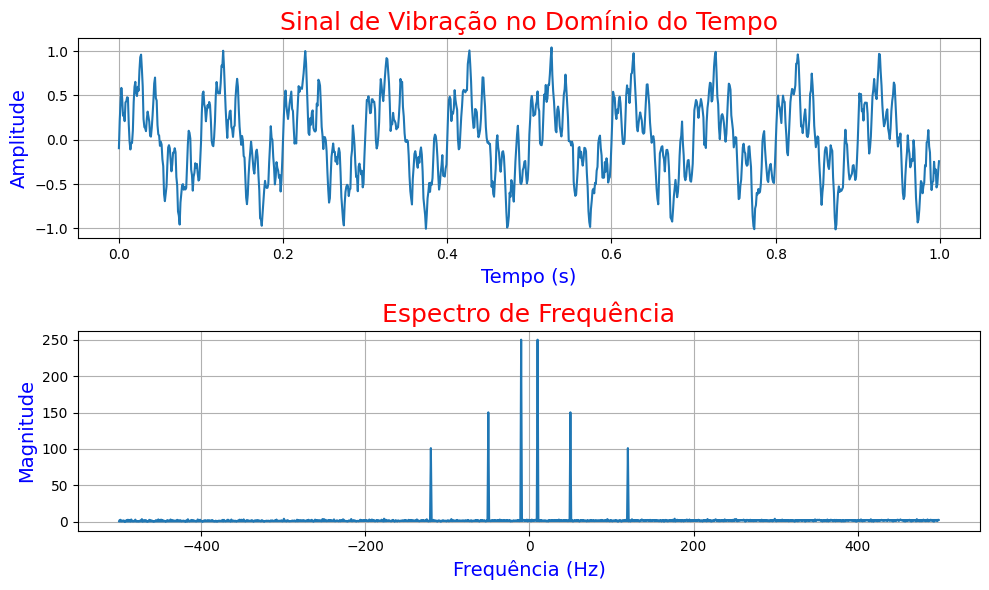

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Simulação de dados de vibração:
def simulate_vibration(t: np.ndarray, frequencies: list, amplitudes: list) -> np.ndarray:
    """
    Simula um sinal de vibração com base em frequências e amplitudes fornecidas.

    Esta função gera um sinal de vibração combinando ondas senoidais para cada
    frequência e amplitude especificadas. O sinal resultante é a soma das
    ondas senoidais, representando a vibração total ao longo do tempo.

    Parâmetros:
    t (numpy.ndarray): Um array unidimensional que representa o tempo em segundos.
    frequencies (list): Uma lista de frequências (em Hz) para as quais as ondas
                        senoidais serão geradas.
    amplitudes (list): Uma lista de amplitudes correspondentes às frequências,
                       que determina a altura das ondas senoidais.

    Retorna:
    numpy.ndarray: Um array unidimensional contendo o sinal de vibração simulado
                   ao longo do tempo especificado.

    Exemplo:
    >>> t = np.linspace(0, 1, 1000)  # 1 segundo com 1000 pontos
    >>> frequencies = [5, 10]          # Frequências em Hz
    >>> amplitudes = [1, 0.5]          # Amplitudes correspondentes
    >>> signal = simulate_vibration(t, frequencies, amplitudes)
    """
    
    signal = np.zeros_like(t)
    for f, a in zip(frequencies, amplitudes):
        signal += a * np.sin(2 * np.pi * f * t)
    
    return signal


# Parâmetros da simulação:
duration = 1.0  # segundos
sample_rate = 1000  # Hz
n_samples = int(duration * sample_rate)
t = np.linspace(0, duration, n_samples, endpoint=False)

# Simulando um sinal com múltiplas frequências:
frequencies = [10, 50, 120]  # Hz
amplitudes = [0.5, 0.3, 0.2]
vibration_signal = simulate_vibration(t, frequencies, amplitudes)

# Adicionando ruído ao sinal:
noise = np.random.normal(0, 0.05, n_samples) # gera números aleatórios que seguem uma distribuição normal/gaussiana (média, desvio padrão, Valores aleatórios)
noisy_signal = vibration_signal + noise # A adição do ruído simula condições mais realistas em aplicações práticas, onde os sinais podem ser afetados por interferências externas ou limitações dos sensores.

# Realizando a Transformada Rápida de Fourier (FFT):
fft_result = fft(noisy_signal)
fft_freq = np.fft.fftfreq(n_samples, 1/sample_rate)

# Calculando a magnitude do espectro:
magnitude_spectrum = np.abs(fft_result)

# Plotando os resultados
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal)
plt.title('Sinal de Vibração no Domínio do Tempo', c="r", fontsize=18)
plt.xlabel('Tempo (s)', c="b", fontsize=14)
plt.ylabel('Amplitude', c="b", fontsize=14)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(fft_freq[:n_samples], magnitude_spectrum[:n_samples]) # Pode usar (apenas para a parte positiva) --> fft_freq[:n_samples//2], magnitude_spectrum[:n_samples//2]
"""
O motivo para selecionar apenas metade das frequências é devido à propriedade de simetria da FFT de sinais reais. 
Quando calculamos a FFT de um sinal real, a segunda metade dos valores de frequência é simétrica à primeira metade, portanto, é comum considerar apenas a primeira metade.
"""
plt.title('Espectro de Frequência', c="r", fontsize=18)
plt.xlabel('Frequência (Hz)', c="b", fontsize=14)
plt.ylabel('Magnitude', c="b", fontsize=14)
#plt.xlim(0, 200)

plt.tight_layout() # Serve para ajustar automaticamente os parâmetros de subplot, garantindo que os elementos do gráfico (como títulos, rótulos e legendas) não se sobreponham e que haja um espaçamento adequado entre eles.
plt.grid(True)
plt.show()

In [8]:
from scipy.signal import find_peaks  # Adicionando esta importação

# Identificando as frequências dominantes corretamente:
peaks, _ = find_peaks(magnitude_spectrum[:n_samples//2], height=0.1*np.max(magnitude_spectrum[:n_samples//2]))
peak_frequencies = fft_freq[peaks]
peak_frequencies = peak_frequencies[peak_frequencies > 0]  # Removendo frequências negativas ou zero
print("Frequências dominantes detectadas:", np.sort(np.abs(peak_frequencies)))

Frequências dominantes detectadas: [ 10.  50. 120.]


# <font color="gree">`Exemplo:` Análise Avançada de Vibração - Detecção de Falha em Rolamento</font>

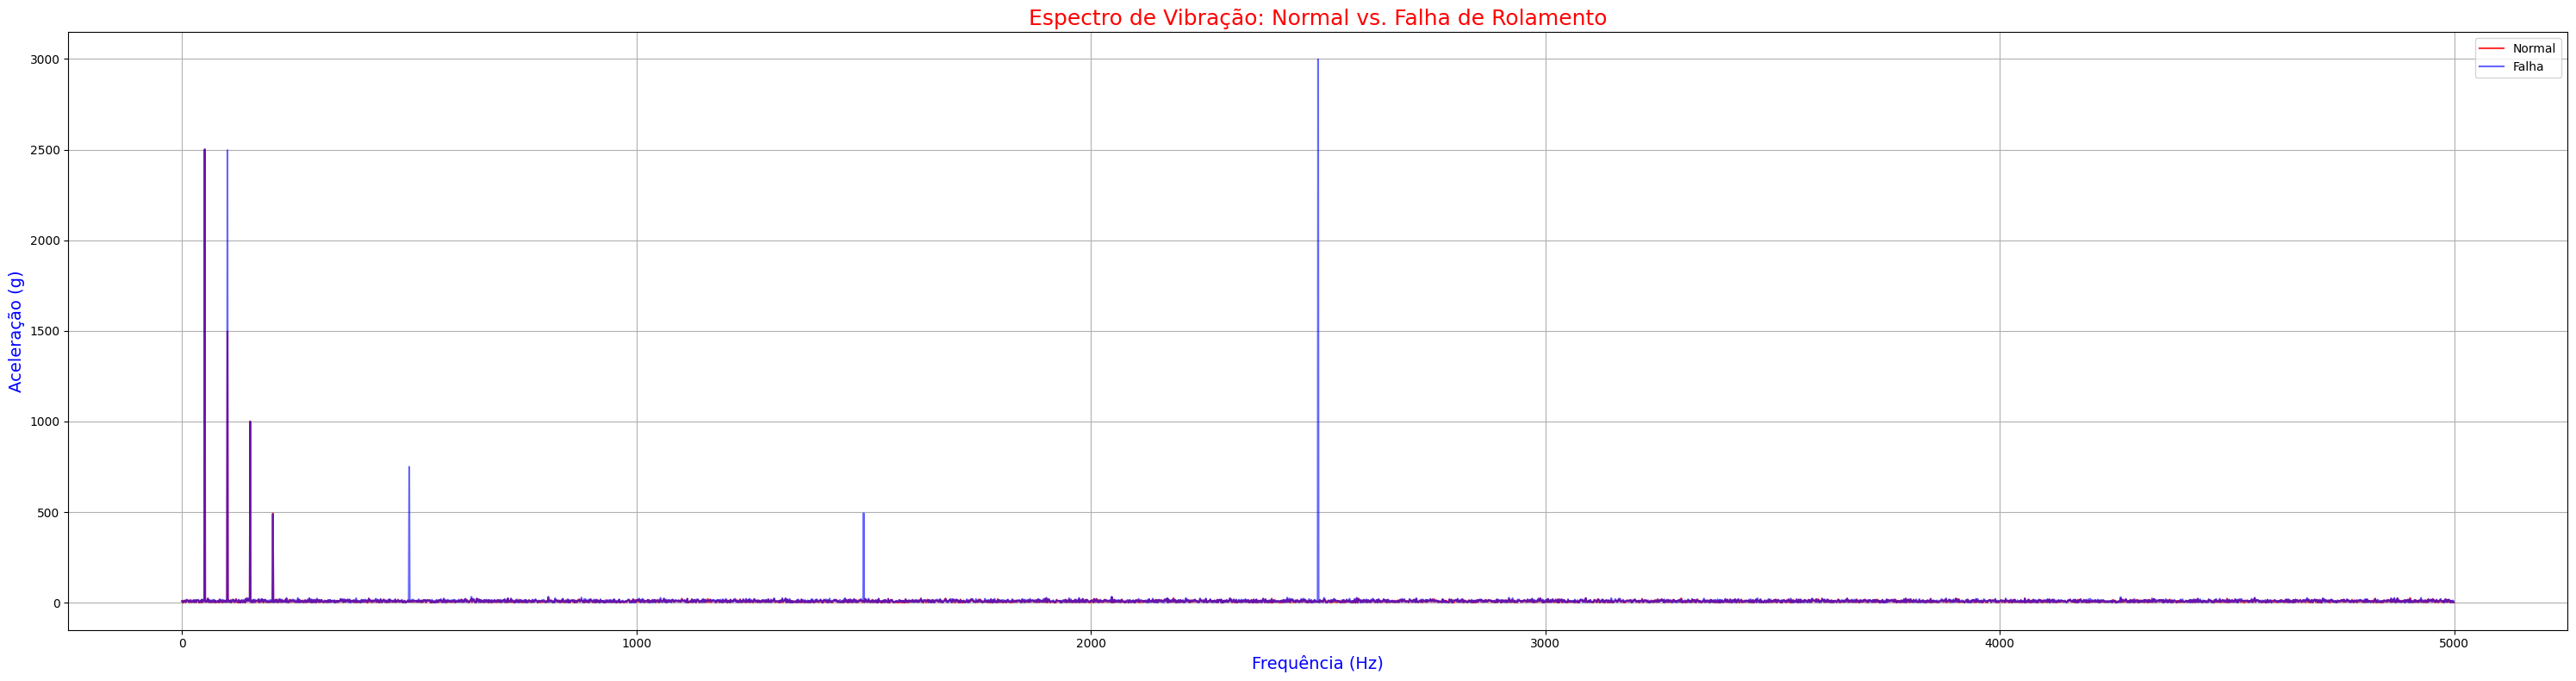

In [90]:
import numpy as np
from typing import List, Union
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def simulate_vibration(
    t: np.ndarray, 
    base_freq: float, 
    harmonics: List[int], 
    amplitudes: List[float], 
    noise_level: float = 0.1
) -> np.ndarray:
    """
    Simula um sinal de vibração com harmônicos e ruído gaussiano.

    Esta função é útil para gerar sinais sintéticos que podem ser usados em análise 
    de vibração e manutenção preditiva de ativos industriais.

    Args:
        t (np.ndarray): Array de tempo para a simulação.
        base_freq (float): Frequência fundamental do sinal em Hz.
        harmonics (List[int]): Lista de múltiplos inteiros da frequência fundamental.
        amplitudes (List[float]): Lista de amplitudes correspondentes a cada harmônico.
        noise_level (float, opcional): Desvio padrão do ruído gaussiano. Padrão é 0.1.

    Returns:
        np.ndarray: Sinal de vibração simulado com harmônicos e ruído.
    """
    signal = np.zeros_like(t)
    for h, a in zip(harmonics, amplitudes):
        signal += a * np.sin(2 * np.pi * base_freq * h * t)
    noise = np.random.normal(0, noise_level, len(t))
    return signal + noise


# Parâmetros da simulação:
duration = 1.0  # segundos
sample_rate = 10000  # Hz
n_samples = int(duration * sample_rate)
t = np.linspace(0, duration, n_samples, endpoint=False)

# Simulação de vibração normal:
normal_freq = 50  # Hz (frequência fundamental da máquina)
normal_harmonics = [1, 2, 3, 4]
normal_amplitudes = [0.5, 0.3, 0.2, 0.1]
normal_signal = simulate_vibration(t, normal_freq, normal_harmonics, normal_amplitudes)

# Simulação de falha de rolamento (estágio avançado):
bearing_fault_freq = 2500  # Hz
fault_harmonics = [1, 2, 3]
fault_amplitudes = [0.9, 0.6, 0.3]  # 9x maior que o normal na frequência fundamental
faulty_signal = normal_signal + simulate_vibration(t, bearing_fault_freq, fault_harmonics, fault_amplitudes, noise_level=0.05)

# Adicionando componentes de outras falhas:
belt_fault = 0.2 * np.sin(2 * np.pi * 100 * t)  # Falha em correia
structural_fault = 0.15 * np.sin(2 * np.pi * 500 * t)  # Falha estrutural
electrical_fault = 0.1 * np.sin(2 * np.pi * 1500 * t)  # Falha elétrica

faulty_signal += belt_fault + structural_fault + electrical_fault

# Cálculo do espectro de frequência:
def calculate_spectrum(signal):
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(n_samples, 1/sample_rate)
    magnitude = np.abs(fft_result)
    return freq[:n_samples//2], magnitude[:n_samples//2]

freq_normal, mag_normal = calculate_spectrum(normal_signal)
freq_faulty, mag_faulty = calculate_spectrum(faulty_signal)

# Plotagem:
plt.figure(figsize=(30, 8))
plt.plot(freq_normal, mag_normal, label='Normal', alpha=0.8, color="red")
plt.plot(freq_faulty, mag_faulty, label='Falha', alpha=0.6, color="blue")
plt.title('Espectro de Vibração: Normal vs. Falha de Rolamento', c="r", fontsize=18)
plt.xlabel('Frequência (Hz)', c="b", fontsize=14)
plt.ylabel('Aceleração (g)', c="b", fontsize=14)
plt.legend()
#plt.xlim(0, 5000) # Quando estiver interessado apenas em uma parte específica dos dados, como um intervalo de tempo ou uma faixa de valores, usar 'plt.xlim(left, right)' pode ajudar a isolar essa área.
#plt.yscale('log') # quando há uma grande variação entre os valores (como em dados financeiros, acústicos ou científicos), a escala logarítmica pode facilitar a análise.
plt.tight_layout()
plt.grid(True)

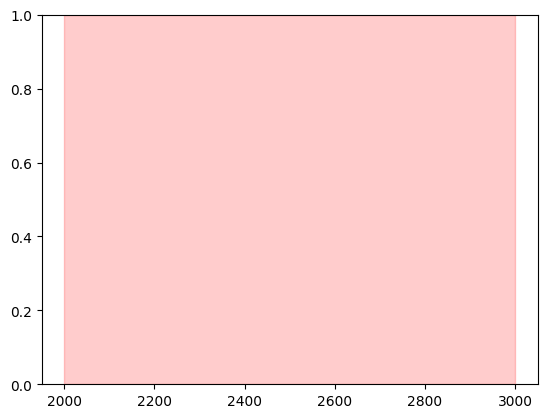

In [92]:
# Destacando a região de falha do rolamento:
plt.axvspan(2000, 3000, color='red', alpha=0.2, label='Região de Falha do Rolamento')
plt.show()

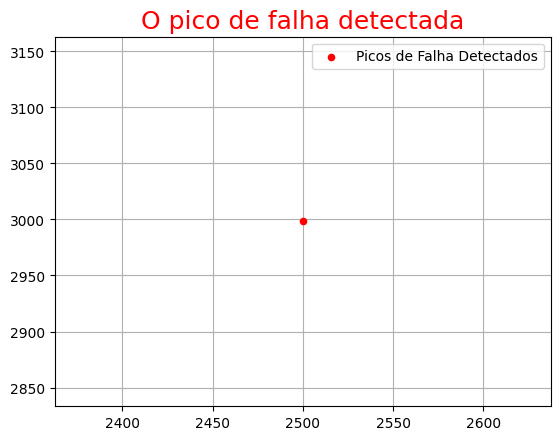

In [97]:
# Detecção de picos na região de falha:
peaks, _ = find_peaks(mag_faulty[(freq_faulty >= 2000) & (freq_faulty <= 3000)], 
                      height=np.max(mag_normal[(freq_normal >= 2000) & (freq_normal <= 3000)]) * 3)

peak_freqs = freq_faulty[(freq_faulty >= 2000) & (freq_faulty <= 3000)][peaks]
peak_mags = mag_faulty[(freq_faulty >= 2000) & (freq_faulty <= 3000)][peaks]


plt.scatter(peak_freqs, peak_mags, color='red', s=20, zorder=5, label='Picos de Falha Detectados')
plt.title('O pico de falha detectada', c="r", fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

In [98]:
# Análise dos picos detectados:
print("Picos de falha detectados:")
for freq, mag in zip(peak_freqs, peak_mags):
    normal_mag = np.interp(freq, freq_normal, mag_normal)
    ratio = mag / normal_mag
    print(f"Frequência: {freq:.2f} Hz, Amplitude: {mag:.2e} g, {ratio:.1f}x maior que o normal")
    

Picos de falha detectados:
Frequência: 2500.00 Hz, Amplitude: 3.00e+03 g, 652.3x maior que o normal


# <font color="blue">Simulação de Desbalanceamento em Python</font>

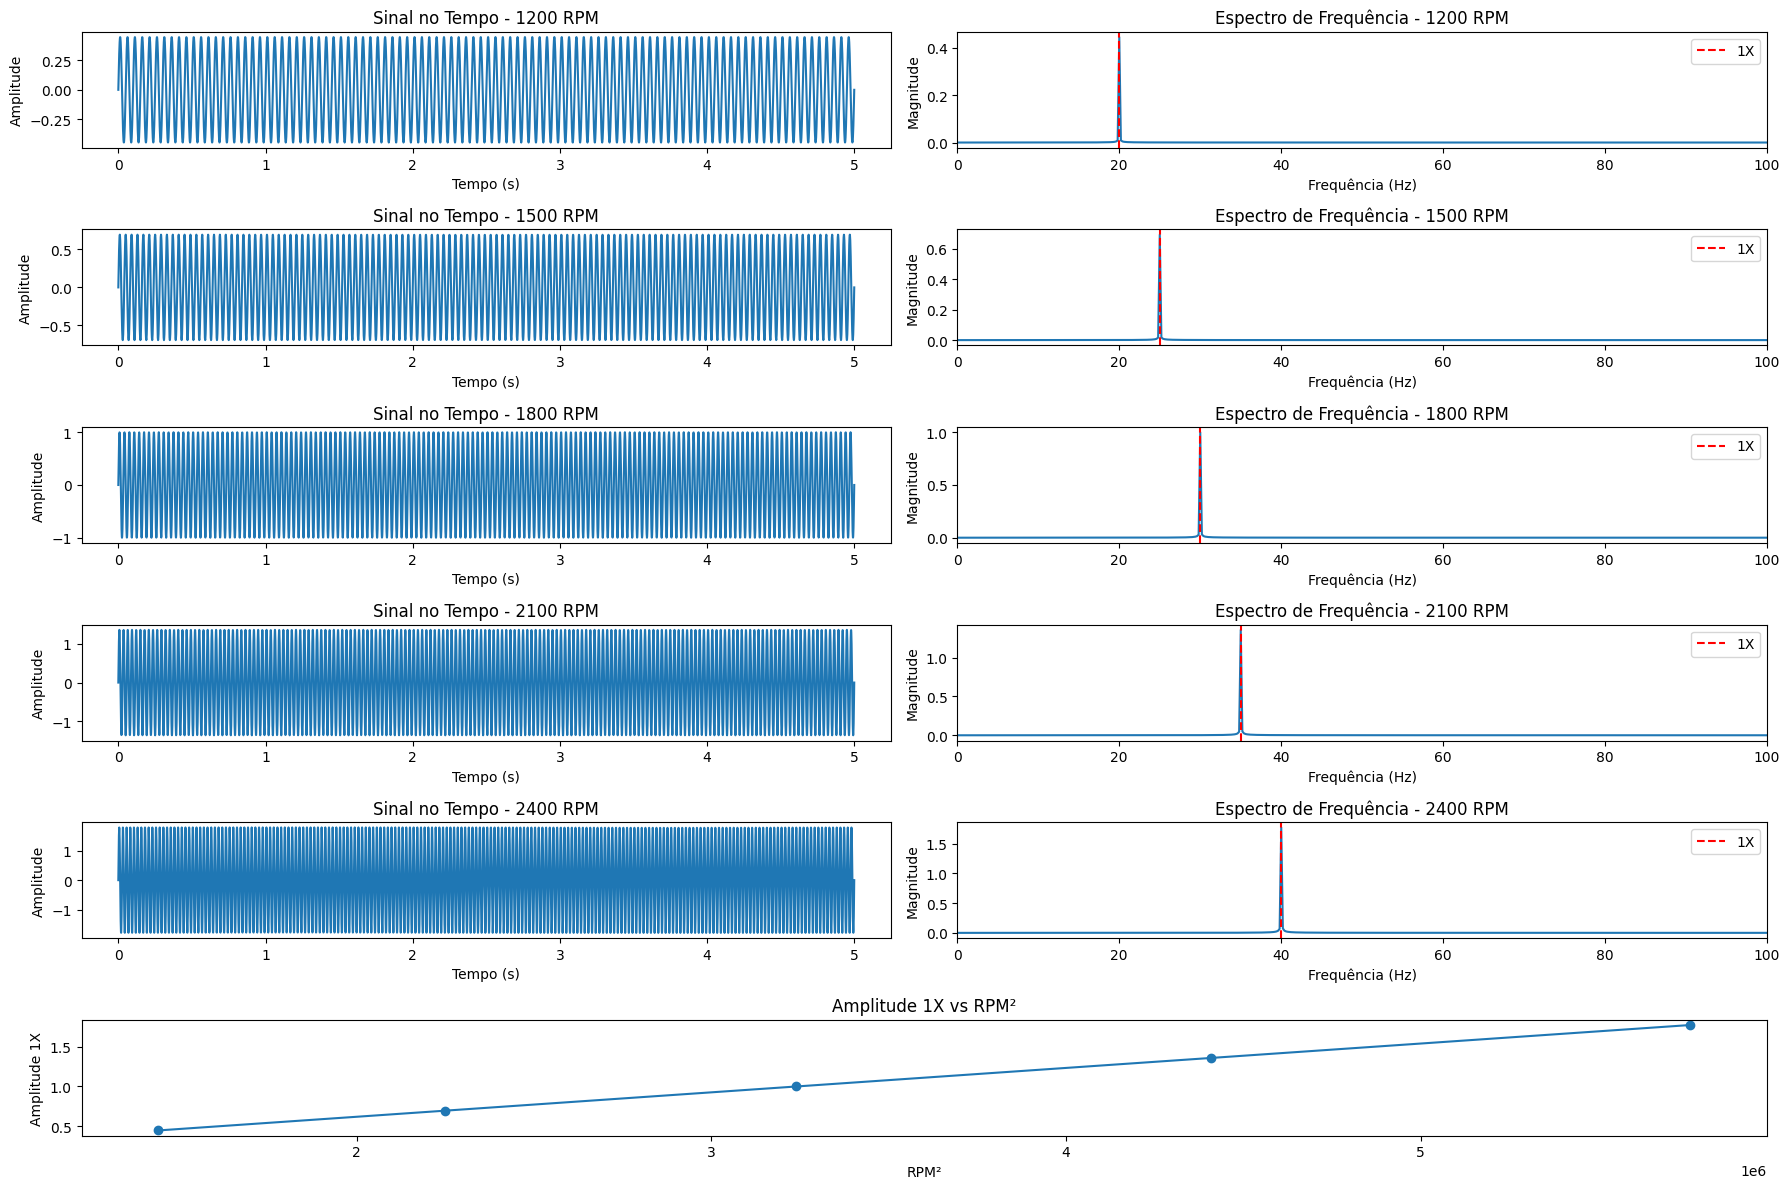

RPM	Freq. Rotação (Hz)	Amplitude 1X	Fase (radianos)
1200	20.00			0.4441		-0.0000
1500	25.00			0.6937		0.0013
1800	30.00			0.9984		0.0013
2100	35.00			1.3582		-0.0000
2400	40.00			1.7729		-0.0000

Coeficiente de relação quadrática: 0.000000
R² = 1.0000


In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import hilbert

def simular_desbalanceamento(rpm, amplitude_base=1.0, tempo=5, fs=1000):
    t = np.linspace(0, tempo, tempo * fs)
    f_rotacao = rpm / 60
    sinal = amplitude_base * (rpm/1800)**2 * np.sin(2 * np.pi * f_rotacao * t)
    return t, sinal

def calcular_fft(sinal, fs):
    n = len(sinal)
    fft_result = fft(sinal)
    freq = np.linspace(0, fs/2, n//2)
    return freq, 2.0/n * np.abs(fft_result[:n//2])

def calcular_fase(sinal):
    analytic_signal = hilbert(sinal)
    instantaneous_phase = np.angle(analytic_signal)
    return instantaneous_phase

# Simular para diferentes velocidades
rpms = [1200, 1500, 1800, 2100, 2400]
amplitudes = []
fases = []

plt.figure(figsize=(18, 12))

for i, rpm in enumerate(rpms):
    t, sinal = simular_desbalanceamento(rpm)
    freq, magnitude = calcular_fft(sinal, 1000)
    fase = calcular_fase(sinal)
    
    # Encontrar a amplitude na frequência fundamental
    f_rotacao = rpm / 60
    idx = np.argmin(np.abs(freq - f_rotacao))
    amplitude_1x = magnitude[idx]
    amplitudes.append(amplitude_1x)
    fases.append(np.mean(fase))
    
    # Plotar o sinal no tempo
    plt.subplot(6, 2, 2*i+1)
    plt.plot(t, sinal)
    plt.title(f'Sinal no Tempo - {rpm} RPM')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    
    # Plotar o espectro de frequência
    plt.subplot(6, 2, 2*i+2)
    plt.plot(freq, magnitude)
    plt.title(f'Espectro de Frequência - {rpm} RPM')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 100)  # Limitando a visualização até 100 Hz
    plt.axvline(x=f_rotacao, color='r', linestyle='--', label='1X')
    plt.legend()

# Plotar a relação amplitude vs RPM²
plt.subplot(6, 2, (11, 12))
rpm_squared = [r**2 for r in rpms]
plt.plot(rpm_squared, amplitudes, 'o-')
plt.title('Amplitude 1X vs RPM²')
plt.xlabel('RPM²')
plt.ylabel('Amplitude 1X')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("RPM\tFreq. Rotação (Hz)\tAmplitude 1X\tFase (radianos)")
for rpm, amp, fase in zip(rpms, amplitudes, fases):
    print(f"{rpm}\t{rpm/60:.2f}\t\t\t{amp:.4f}\t\t{fase:.4f}")

# Verificar a relação quadrática
coef = np.polyfit(rpm_squared, amplitudes, 1)
print(f"\nCoeficiente de relação quadrática: {coef[0]:.6f}")
print(f"R² = {np.corrcoef(rpm_squared, amplitudes)[0,1]**2:.4f}")

# <font color="pink">Dados Globais</font>

<font color="orange">Dados globais, no contexto de análise de vibração, `são medidas estatísticas que resumem as características gerais de um sinal de vibração em um único valor numérico`. Esses valores fornecem uma visão geral do estado vibratório de uma máquina ou equipamento, sem entrar nos detalhes específicos das frequências individuais presentes no sinal.</font>


<font color="red">Tipos de Dados Globais:</font>

* `Valor RMS (Root Mean Square):`

    * É o tipo mais comum de dado global em análise de vibração.

    * Representa a energia média do sinal de vibração.

    * Calculado pela raiz quadrada da média dos quadrados dos `valores instantâneos` do sinal.

    * Unidades: geralmente `mm/s para velocidade` ou `g para aceleração`.

* `Valor de Pico:`

    * Representa a amplitude máxima do sinal de vibração em um determinado período.

    * Útil para detectar impactos ou eventos transitórios de curta duração.

* `Valor Pico a Pico:`

    * É a diferença entre o valor máximo positivo e o valor máximo negativo do sinal.

    * Fornece informação sobre a faixa total de movimento da vibração.

* `Fator de Crista:`

    * É a razão entre o `valor de pico` e o `valor RMS`.

    * Indicador útil para detectar falhas incipientes, especialmente em `rolamentos`.


<font color="red">Aplicações dos Dados Globais:</font>

* `Monitoramento de Tendências:`

    * Os dados globais são excelentes para acompanhar a evolução da vibração ao longo do tempo.

    * `Permitem a criação de gráficos de tendência` que mostram como a vibração geral da máquina está mudando.

* `Alarmes e Alertas:`

    * Valores globais são frequentemente usados para configurar alarmes em sistemas de monitoramento contínuo.

    * Limites de alerta e alarme podem ser definidos com base em normas (como `ISO 10816`) ou na experiência operacional.

* `Avaliação Rápida da Condição da Máquina:`

    * Fornecem uma indicação rápida e simples do estado geral da máquina.

    * Úteis para comparações rápidas entre `máquinas similares` ou com `dados históricos`.

* `Triagem de Problemas:`

    * Podem ser usados como primeiro passo na identificação de máquinas que precisam de análise mais detalhada.


<font color="red">Vantagens e Limitações:</font>

* `Vantagens:`

    * Fáceis de entender e interpretar, mesmo por pessoal não especializado.

    * Requerem menos armazenamento de dados comparado a espectros completos.

    * Eficientes para monitoramento de longo prazo e detecção de mudanças graduais.

* `Limitações:`

    * Não fornecem informações detalhadas sobre as frequências específicas presentes na vibração.

    * `Podem mascarar problemas em estágios iniciais que seriam visíveis em uma análise espectral`.

<font color="red">Uso na Manutenção Preditiva:</font>

* Os dados globais são frequentemente o primeiro nível de análise em programas de manutenção preditiva.

* Permitem o acompanhamento de um grande número de pontos de medição com relativa simplicidade.

* Quando os valores globais indicam uma mudança significativa, análises mais detalhadas (`como análise espectral ou de envelope`) são realizadas.


<font color="red">Coleta e Análise:</font>


* Geralmente coletados em três direções ortogonais (`axial`, `radial horizontal` e `radial vertical`) em cada ponto de medição.

* Podem ser coletados com medidores portáteis ou sistemas de monitoramento online.

* A análise de tendência é crucial, comparando os valores atuais com o histórico da máquina e com limites pré-estabelecidos.


<font color="red">Integração com Outras Técnicas:</font>


* Dados globais são frequentemente usados em conjunto com outras técnicas de análise de vibração.

* Servem como um "gatilho" para investigações mais aprofundadas quando necessário.


Entender bem o conceito e aplicação dos dados globais é fundamental para uma eficiente estratégia de manutenção preditiva baseada em análise de vibração. Eles fornecem uma visão geral rápida e eficaz do estado da máquina, permitindo um monitoramento contínuo e eficiente de grandes parques de máquinas.



Valor RMS: 0.8467
Valor de Pico: 2.0818
Valor Pico a Pico: 3.9368
Fator de Crista: 2.4585


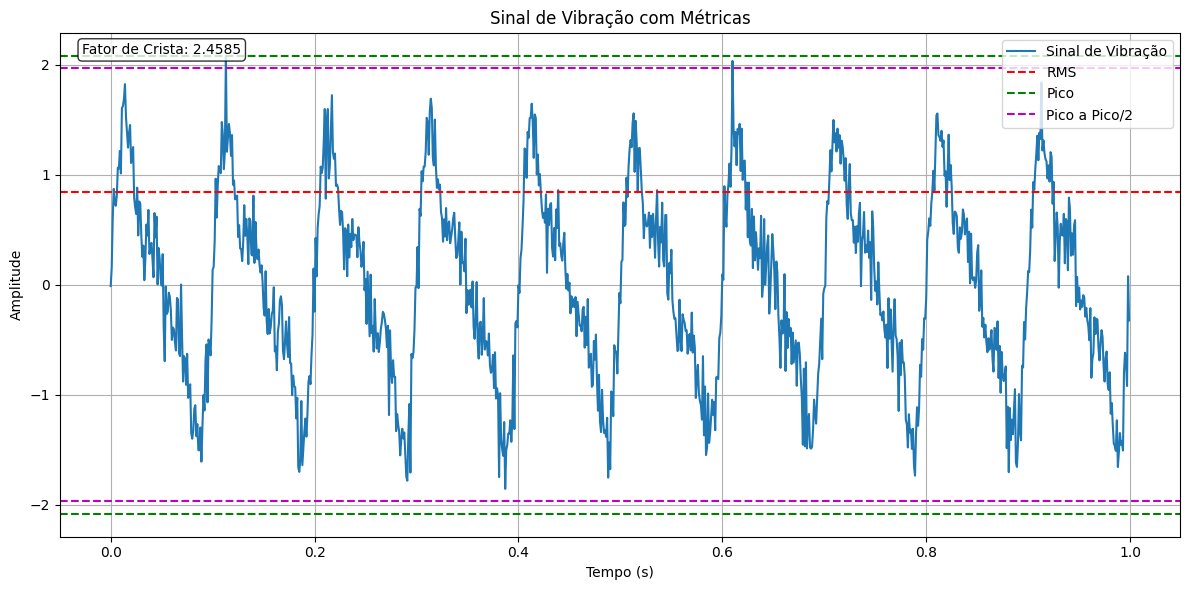

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar um sinal de vibração simulado:
def generate_vibration_signal(n_samples, sampling_rate): # Cria um sinal sintético que simula uma vibração real.
    t = np.linspace(0, n_samples/sampling_rate, n_samples, endpoint=False)
    signal = (
        np.sin(2 * np.pi * 10 * t) +  # Componente fundamental
        0.5 * np.sin(2 * np.pi * 20 * t) +  # Primeiro harmônico (20 Hz)
        0.3 * np.sin(2 * np.pi * 30 * t) +  # Segundo harmônico (30 Hz)
        0.2 * np.random.randn(n_samples)  # Ruído aleatório
    )
    return t, signal

# Função para calcular o valor RMS, O RMS é importante porque representa a energia média do sinal de vibração.
def calculate_rms(signal): # Implementa a fórmula do RMS (raiz quadrada da média dos quadrados dos valores).
    return np.sqrt(np.mean(np.square(signal)))

# Função para calcular o Valor de Pico
def calculate_peak_value(signal): # Encontra o maior valor absoluto no sinal.
    return np.max(np.abs(signal)) # O valor de pico é útil para detectar eventos transientes ou impactos no sinal de vibração.

# Função para calcular o Valor de Pico a Pico
def calculate_peak_to_peak(signal): # Subtrai o valor mínimo do valor máximo do sinal.
    return np.max(signal) - np.min(signal) # Este valor representa a amplitude total da vibração, útil para entender o deslocamento máximo.

# Função para calcular o Fator de Crista
def calculate_crest_factor(signal): # Divide o valor de pico pelo valor RMS.
    rms = calculate_rms(signal)
    peak = calculate_peak_value(signal) # Um fator de crista alto pode indicar impactos ou falhas incipientes, especialmente em rolamentos.
    return peak / rms if rms != 0 else 0 # Um aumento neste valor pode indicar o início de falhas em rolamentos ou engrenagens antes que sejam visíveis no RMS.

# Parâmetros do sinal
n_samples = 1000
sampling_rate = 1000  # Hz
# Gerar sinal de vibração simulado
t, vibration_signal = generate_vibration_signal(n_samples, sampling_rate)

# Calcular valores globais
rms_value = calculate_rms(vibration_signal)
peak_value = calculate_peak_value(vibration_signal)
peak_to_peak_value = calculate_peak_to_peak(vibration_signal)
crest_factor = calculate_crest_factor(vibration_signal)

# Imprimir resultados
print(f"Valor RMS: {rms_value:.4f}")
print(f"Valor de Pico: {peak_value:.4f}")
print(f"Valor Pico a Pico: {peak_to_peak_value:.4f}")
print(f"Fator de Crista: {crest_factor:.4f}")

# Plotar o sinal e as métricas
plt.figure(figsize=(12, 6))
plt.plot(t, vibration_signal, label='Sinal de Vibração')
plt.axhline(y=rms_value, color='r', linestyle='--', label='RMS')
plt.axhline(y=peak_value, color='g', linestyle='--', label='Pico')
plt.axhline(y=-peak_value, color='g', linestyle='--')
plt.axhline(y=peak_to_peak_value/2, color='m', linestyle='--', label='Pico a Pico/2')
plt.axhline(y=-peak_to_peak_value/2, color='m', linestyle='--')

# Adicionar anotação para o Fator de Crista
plt.text(0.02, 0.98, f'Fator de Crista: {crest_factor:.4f}', 
         transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title('Sinal de Vibração com Métricas')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# <font color="pink">Análise Espectral</font>

<font color="orange">A análise espectral é uma técnica que transforma o sinal de vibração do domínio do `tempo` para o domínio da `frequência`. Isso permite identificar as frequências específicas presentes no sinal de vibração.</font>

`Importância:`

* Permite identificar a origem de problemas específicos em máquinas rotativas.

* Facilita a distinção entre `diferentes fontes de vibração`.

* Ajuda a detectar falhas incipientes antes que se tornem críticas.

`Transformada de Fourier:`

* A análise espectral é geralmente realizada usando a `Transformada Rápida de Fourier` (FFT).

* A `FFT` decompõe o sinal de vibração em suas componentes de frequência.


<font color="red">Harmônicos</font>

Harmônicos são múltiplos inteiros da `frequência fundamental` (geralmente a frequência de rotação da máquina).

* `1X:`O primeiro harmônico ou frequência fundamental (frequência de rotação)

* `2X:` Segundo harmônico (duas vezes a frequência de rotação)

* `3X:` Terceiro harmônico (três vezes a frequência de rotação), `e assim por diante`.


<font color="red">Interpretação dos Harmônicos</font>


* `1X (Frequência de rotação):` A presença de uma forte componente em `1X` no espectro de vibração geralmente está associada a:

    * `Desbalanceamento:` 
    
    Um pico claro em `1X` é o principal sintoma de `desbalanceamento rotacional`, onde a massa do rotor está desequilibrada, causando vibração na frequência de rotação.

    * `Excentricidade:` 
    
    Vibração causada por uma excentricidade no rotor (`centro de massa fora do eixo de rotação`).

    `Exemplo prático: Se você observar um aumento significativo em 1X, a primeira suspeita deve ser desbalanceamento.`


* `2X (Segundo Harmônico):` O `2X` é geralmente associado a:

    * `Desalinhamento angular:` 
    
    Quando os eixos de duas partes rotativas da máquina não estão alinhados adequadamente, gerando forças cíclicas que vibram em `2X`.

    * `Flexão de eixo:` 
    
    Um eixo ligeiramente torto ou flexionado pode causar um aumento de vibração em `2X`.

    `Exemplo prático: Um pico em 2X pode indicar que há desalinhamento entre o motor e a bomba, ou outros componentes rotativos acoplados.`


* `Múltiplos harmônicos:` Podem indicar folgas mecânicas ou problemas de fixação.

* `Harmônicos fracionários:` Podem indicar problemas em `rolamentos` ou engrenagens.

## <font color="red">Simulando uma `falha de Desbalanceamento`</font>

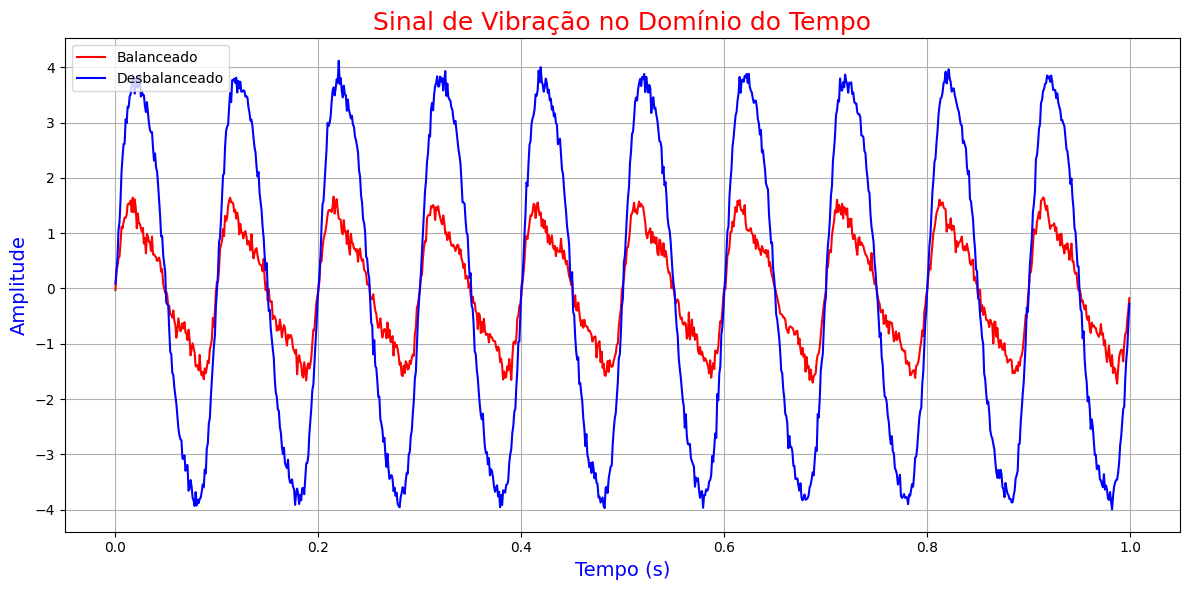

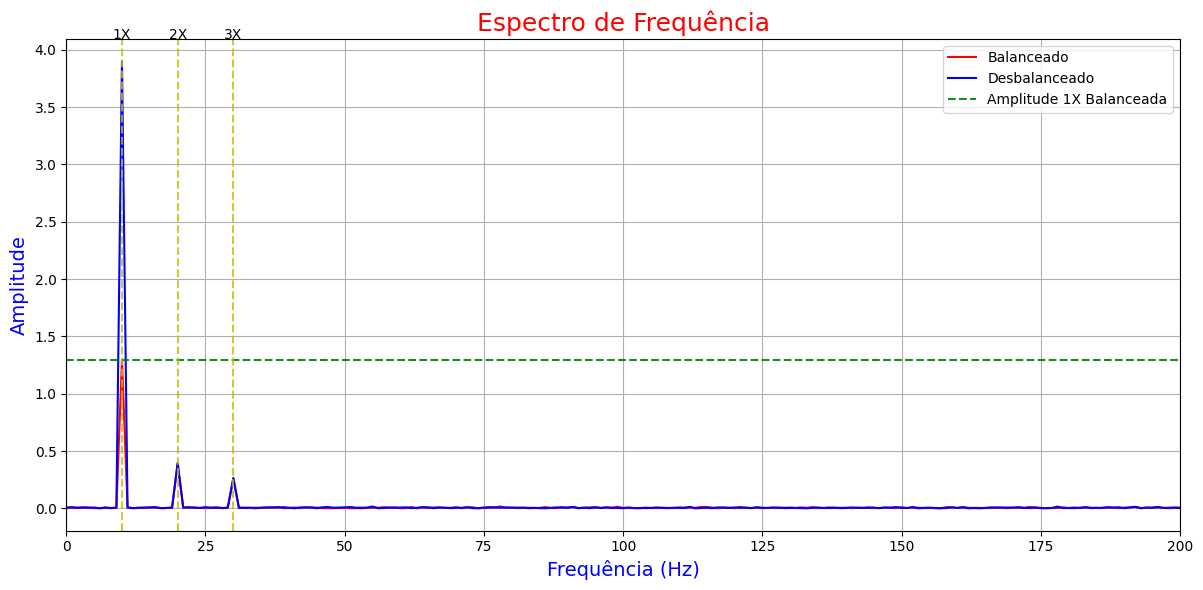

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def generate_vibration_signal(t, freq, amplitude, noise_level=0.1, unbalance=False):
    signal = amplitude * np.sin(2 * np.pi * freq * t)
    if unbalance:
        # Aumenta a amplitude da frequência fundamental para simular desbalanceamento:
        signal *= 3
    # Adiciona harmônicos e ruído:
    signal += 0.3 * amplitude * np.sin(2 * np.pi * 2 * freq * t)  # 2X
    signal += 0.2 * amplitude * np.sin(2 * np.pi * 3 * freq * t)  # 3X
    signal += noise_level * np.random.randn(len(t))
    return signal

def plot_time_domain(t, signal_balanced, signal_unbalanced):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal_balanced, label='Balanceado', c="r")
    plt.plot(t, signal_unbalanced, label='Desbalanceado', c="b")
    plt.title('Sinal de Vibração no Domínio do Tempo', c="r", size="18")
    plt.xlabel('Tempo (s)', c="b", size="14")
    plt.ylabel('Amplitude', c="b", size="14")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

def plot_frequency_domain(t, signal_balanced, signal_unbalanced, freq):
    n = len(t)
    fft_balanced = fft(signal_balanced)
    fft_unbalanced = fft(signal_unbalanced)
    xf = fftfreq(n, t[1] - t[0])[:n//2]
    
    # Calcula a amplitude da frequência fundamental para o sinal balanceado:
    fundamental_freq_index = np.argmin(np.abs(xf - freq))
    fundamental_amplitude_balanced = 2.0/n * np.abs(fft_balanced[fundamental_freq_index])

    plt.figure(figsize=(12, 6))
    plt.plot(xf, 2.0/n * np.abs(fft_balanced[0:n//2]), label='Balanceado', c="r")
    plt.plot(xf, 2.0/n * np.abs(fft_unbalanced[0:n//2]), label='Desbalanceado', c="b")

    # Adiciona a linha horizontal segmentada:
    plt.axhline(y=fundamental_amplitude_balanced, color='g', linestyle='--', alpha=0.9, 
                label='Amplitude 1X Balanceada')
    
    plt.title('Espectro de Frequência', c="r", size="18")
    plt.xlabel('Frequência (Hz)', c="b", size="14")
    plt.ylabel('Amplitude', c="b", size="14")
    plt.legend()
    plt.tight_layout()
    plt.xlim(0, 200)
    plt.grid(True)
    
    # Adiciona anotações para os harmônicos:
    for i in range(1, 4):
        plt.axvline(x=i*freq, color='y', linestyle='--', alpha=0.8)
        plt.text(i*freq, plt.ylim()[1], f'{i}X', horizontalalignment='center')
    
    plt.show()

# Parâmetros da simulação:
duration = 1.0  # segundos
sample_rate = 1000  # Hz
n_samples = int(duration * sample_rate)
t = np.linspace(0, duration, n_samples, endpoint=False)
freq = 10  # Hz (frequência de rotação)
amplitude = 1.3

# Gerar sinais:
signal_balanced = generate_vibration_signal(t, freq, amplitude)
signal_unbalanced = generate_vibration_signal(t, freq, amplitude, unbalance=True)

# Plotar sinais no domínio do tempo:
plot_time_domain(t, signal_balanced, signal_unbalanced)

# Plotar sinais no domínio da frequência:
plot_frequency_domain(t, signal_balanced, signal_unbalanced, freq)
